# Seaborn
- sns.jointplot()
- plt.scatter()
- plt.boxplot()
- plt.violinplot()
- sns.distplot()
- sns.countplot()
- plt.legend()
- plt.xlabel()
- plt.ylabel()
- plt.xticks()
- sns.regplot()
- sns.barplot()
- sns.pairplot()

In [2]:
import pandas as pd
import numpy as np

year_2015= pd.read_csv("2015.csv")

In [3]:
year_2016=pd.read_csv("2016.csv")
year_2017=pd.read_csv("2017.csv")

In [4]:
# univariate analysis.
year_2015["Happiness Score"].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

In [5]:
year_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'GDP per Capita', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
# Using matplot for ploting univariate ditribution
import matplotlib.pyplot as plt

C:\Users\debje\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


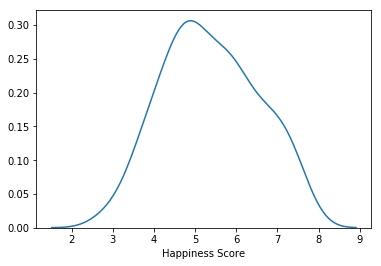

In [14]:
# using seaborn to plot the univariate dist.

import seaborn as sns
sns.distplot(year_2015["Happiness Score"],hist=False)

- probability of the given point or range of data points. (X<=300)
- range on x-axis

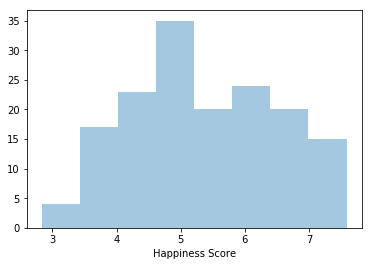

In [15]:
sns.distplot(year_2015["Happiness Score"],kde=False)

- count of frequency on y-axis
- range on x-axis

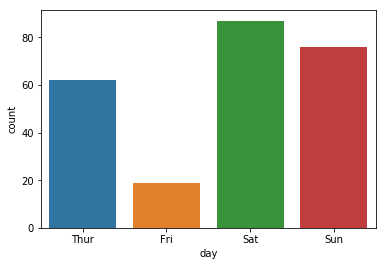

In [16]:
# counting the univariate categorical variable

tips=sns.load_dataset("tips")
sns.countplot(tips["day"])

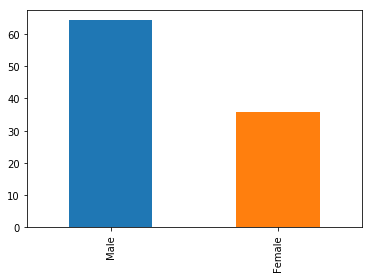

In [17]:
import matplotlib.pyplot as plt
gender_perc=tips["sex"].value_counts()/len(tips)*100
gender_perc.plot(kind="bar")

In [18]:
year_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Text(0.5, 0, 'Regions')

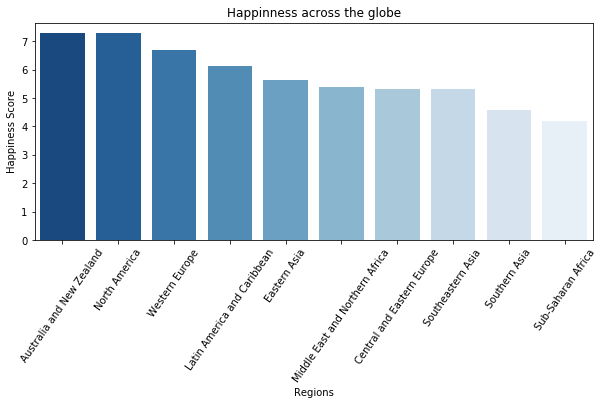

In [19]:
# happiness score across the diff regions.


plt.figure(figsize=(10,4)) # changing the figure size.
seaborn_plot=year_2015.pivot_table(index=["Region"],values="Happiness Score").reset_index().sort_values(by="Happiness Score",ascending=False)
sns.barplot(seaborn_plot["Region"],seaborn_plot["Happiness Score"],palette="Blues_r")
plt.xticks(rotation=55) # this for rotating the labels on x axis.
plt.title("Happinness across the globe")
plt.xlabel("Regions")



# above graph using matplotlib
# year_2015.pivot_table(index=["Region"],values="Happiness Score").plot(kind="bar")

<Figure size 720x2880 with 0 Axes>

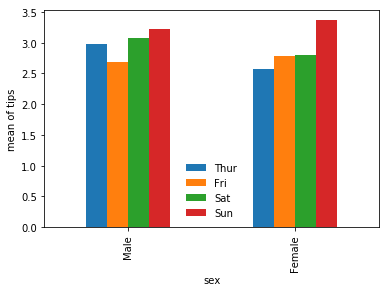

In [47]:

plt.figure(figsize=(10,40))
bar=tips.pivot_table(index="sex",columns="day",values="tip")
bar.plot(kind="bar")
plt.ylabel("mean of tips")
plt.legend(framealpha=0.0000001) # this is used lighten the legend boundary



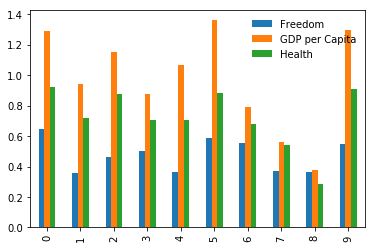

In [48]:
sea=year_2015.pivot_table(index="Region",values=["Health","Freedom","GDP per Capita"]).reset_index()
sea.plot(kind="bar")
plt.legend(framealpha=0)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

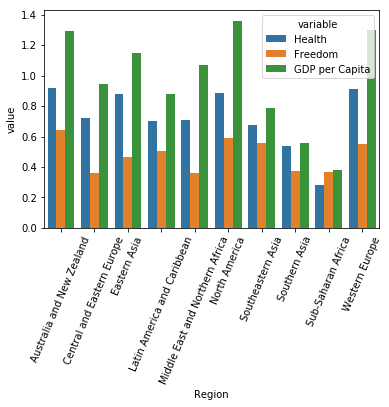

In [95]:
sea=year_2015.pivot_table(index="Region",values=["Health","Freedom","GDP per Capita"]).reset_index()
melting_2015=pd.melt(sea,id_vars="Region",value_vars=["Health","Freedom","GDP per Capita"])
sns.barplot(x=melting_2015["Region"],y=melting_2015["value"],hue=melting_2015["variable"])
plt.xticks(rotation=67)

C:\Users\debje\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


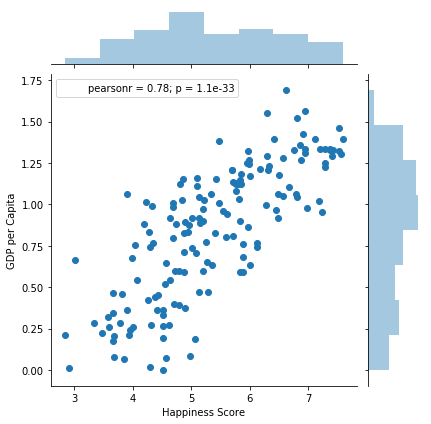

In [44]:
# plotting scatter plot for 2 variables

from scipy import stats as sts
f=sns.jointplot(x=year_2015["Happiness Score"],y=year_2015["GDP per Capita"])
f.annotate(sts.pearsonr)

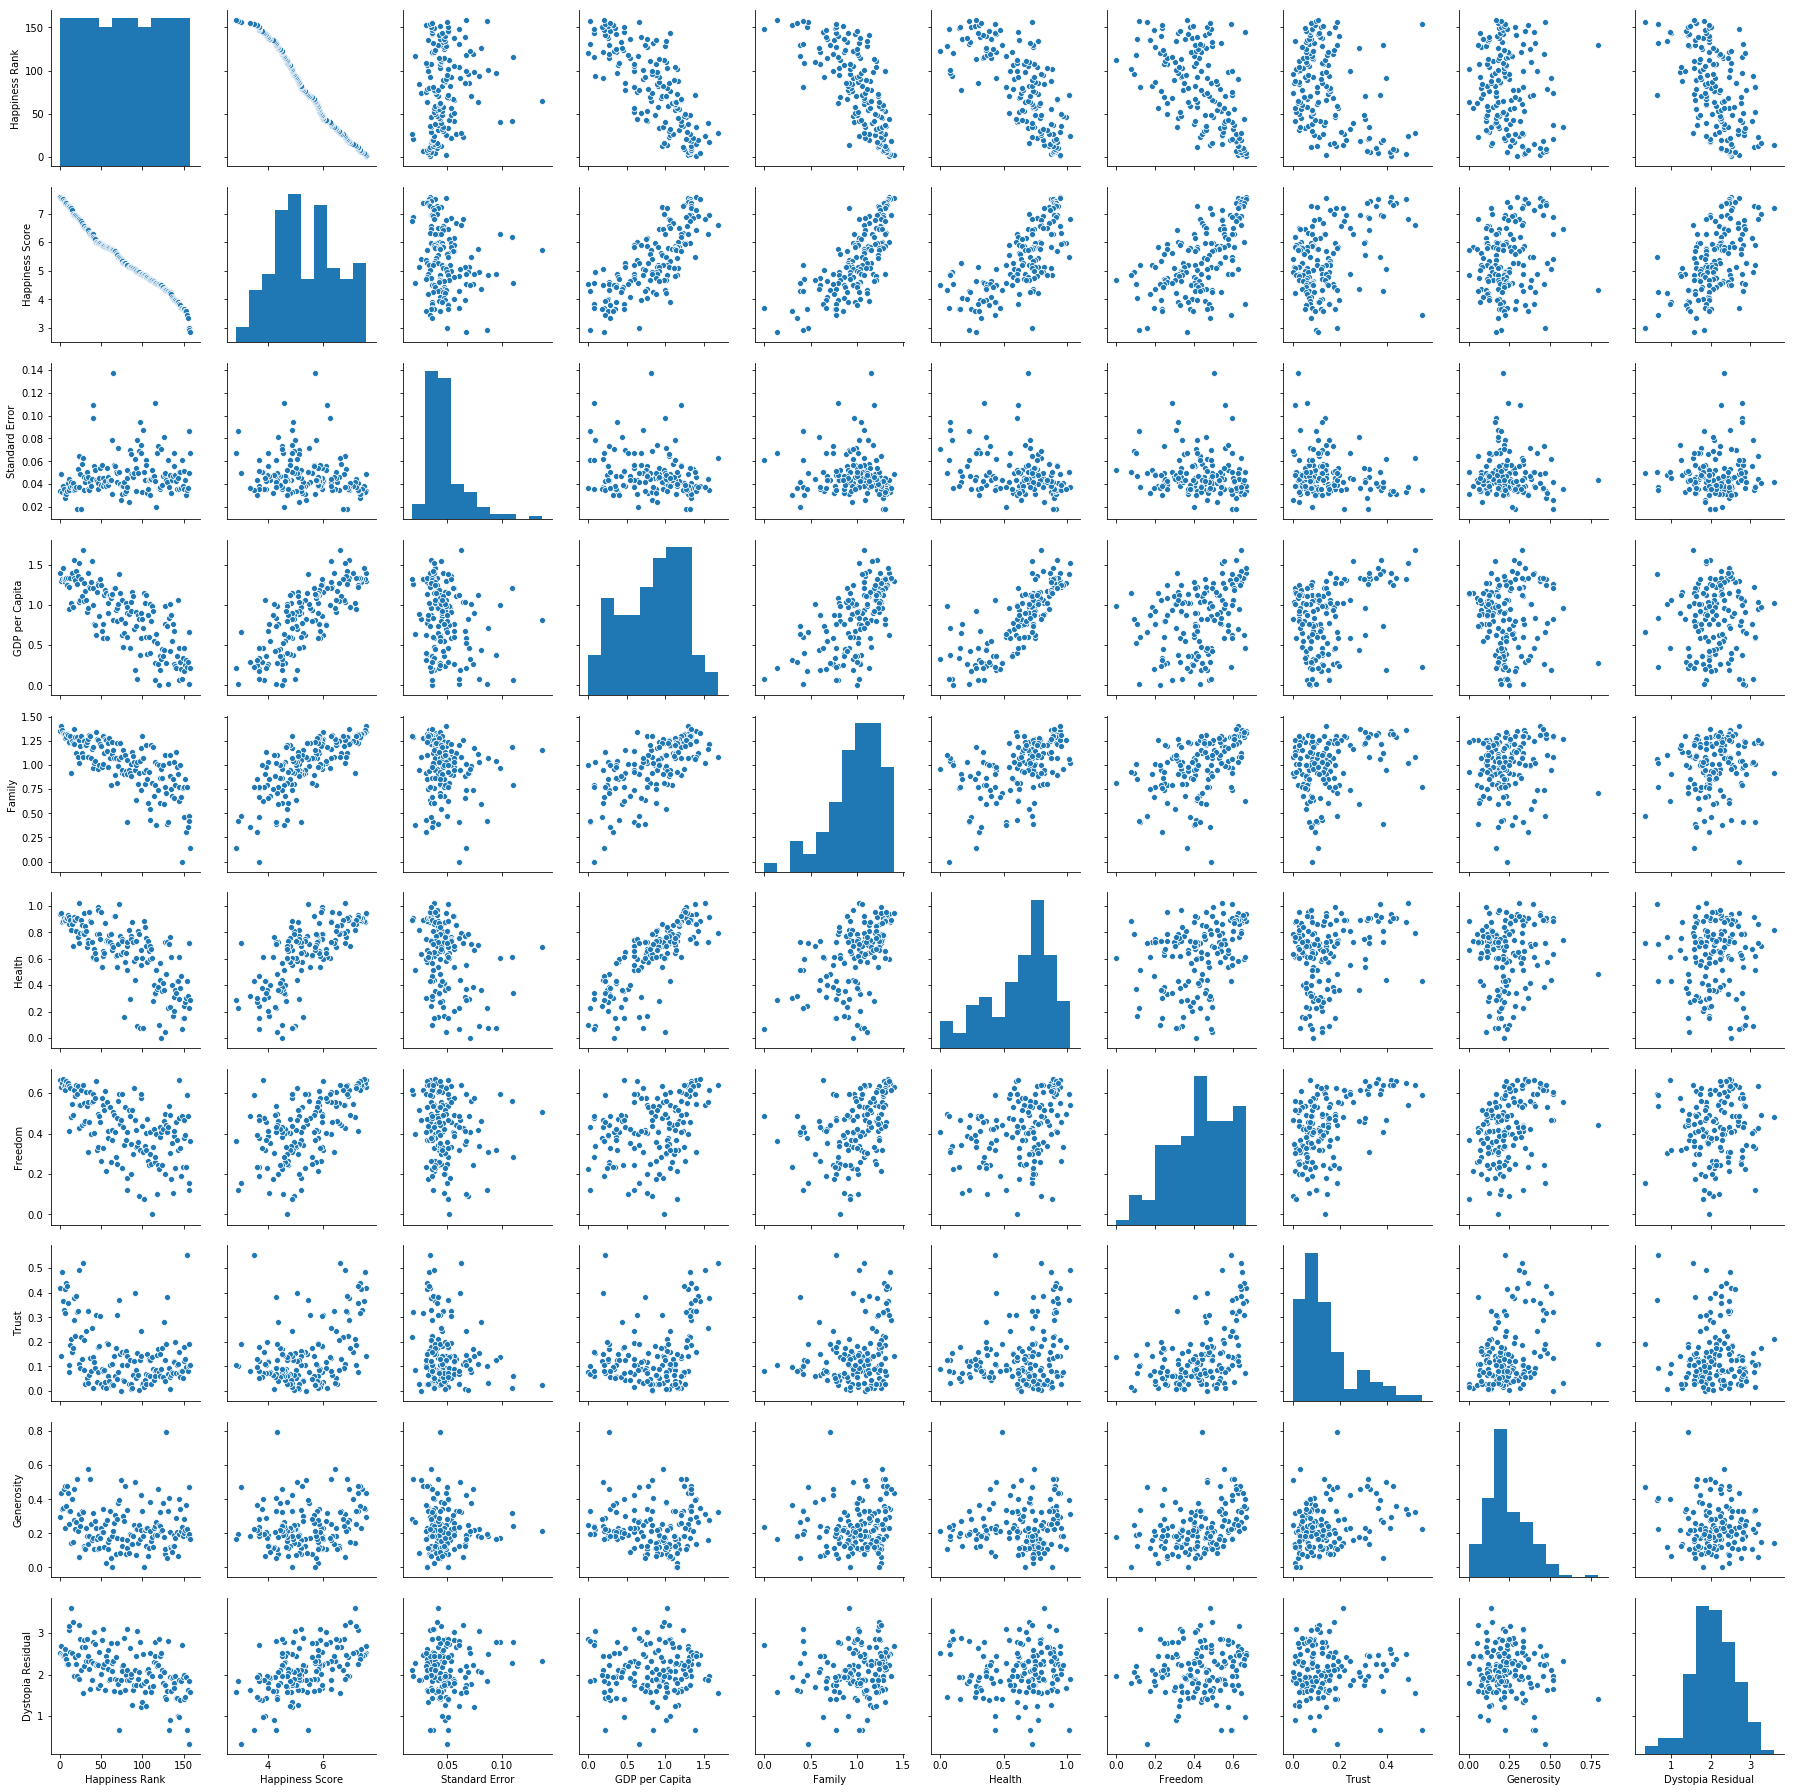

In [43]:
# this plots all the graphs making pairs of each variable with all other variables

sns.pairplot(year_2015)

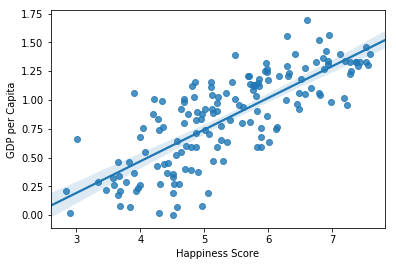

In [53]:
# plotting linear reg line

f=sns.regplot(x=year_2015["Happiness Score"],y=year_2015["GDP per Capita"])

C:\Users\debje\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\debje\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\debje\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


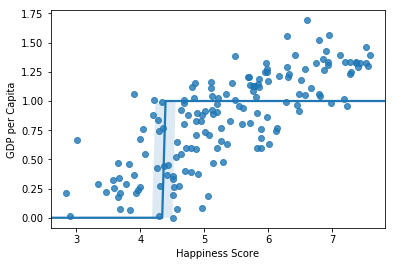

In [52]:
# plotting logistic reg line

f=sns.regplot(x=year_2015["Happiness Score"],y=year_2015["GDP per Capita"],logistic=True)

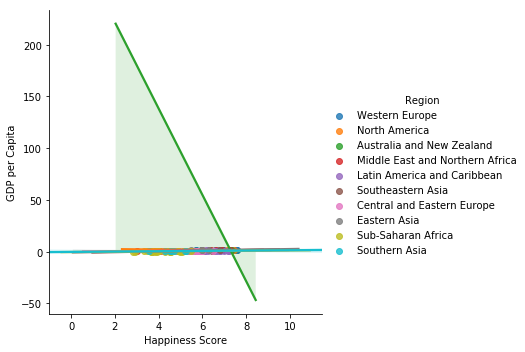

In [68]:
f=sns.lmplot(x="Happiness Score",y="GDP per Capita",data=year_2015,hue="Region")


C:\Users\debje\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


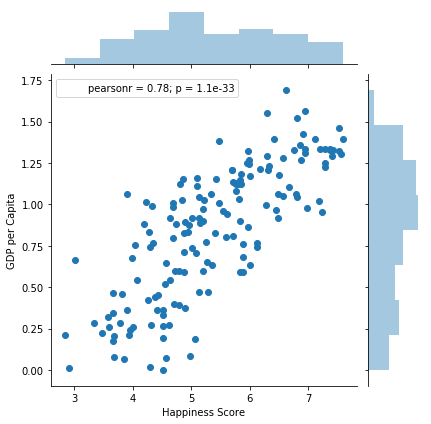

In [74]:
from scipy import stats as sts
f=sns.jointplot(x=year_2015["Happiness Score"],y=year_2015["GDP per Capita"])
f.annotate(sts.pearsonr)

- Following inferences made below are made using the above graph.

In [70]:
# countries how are very happy & low GDP
year_2015[(year_2015["Happiness Score"]>=4.9)& (year_2015["GDP per Capita"]<=0.25)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137


In [73]:
# Contries with good GDP but are unhappy 

year_2015[(year_2015["Happiness Score"]<=3.2)& (year_2015["GDP per Capita"]<=0.75)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Text(0.5, 1.0, 'boxplot of gdp per region')

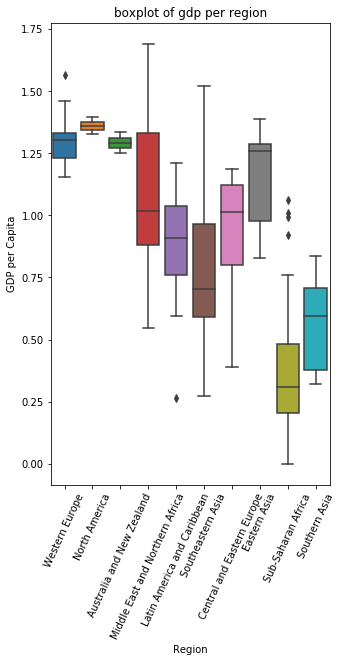

In [97]:
# this shows that which region has more equally distributed income.
# the box plot of autralia & NZ region says the gdp is not equally distributed
# which says there is no economical balance between the countries in that region.

plt.figure(figsize=(5,8.5))

sns.boxplot(x=year_2015["Region"],y=year_2015["GDP per Capita"])
plt.xticks(rotation=65)
plt.title("boxplot of gdp per region")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

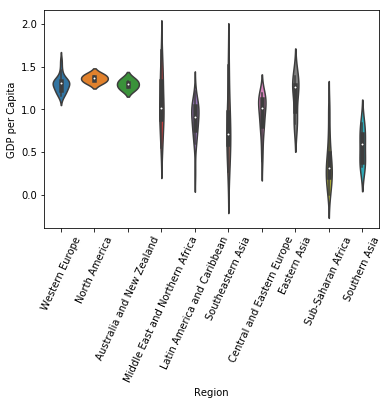

In [89]:
# plotting the violin plot which shows the boxplot along with its population ie it includes the outliers

sns.violinplot(x=year_2015["Region"],y=year_2015["GDP per Capita"])
plt.xticks(rotation=65)